In [35]:
from matplotlib import pyplot as plt
import cv2 as cv
from PIL import Image
from itertools import product
import os
import seaborn as sns
import numpy as np
# sns.set_style('whitegrid')
# sns.set_theme()
plt.rcParams['font.sans-serif']=['simsun']

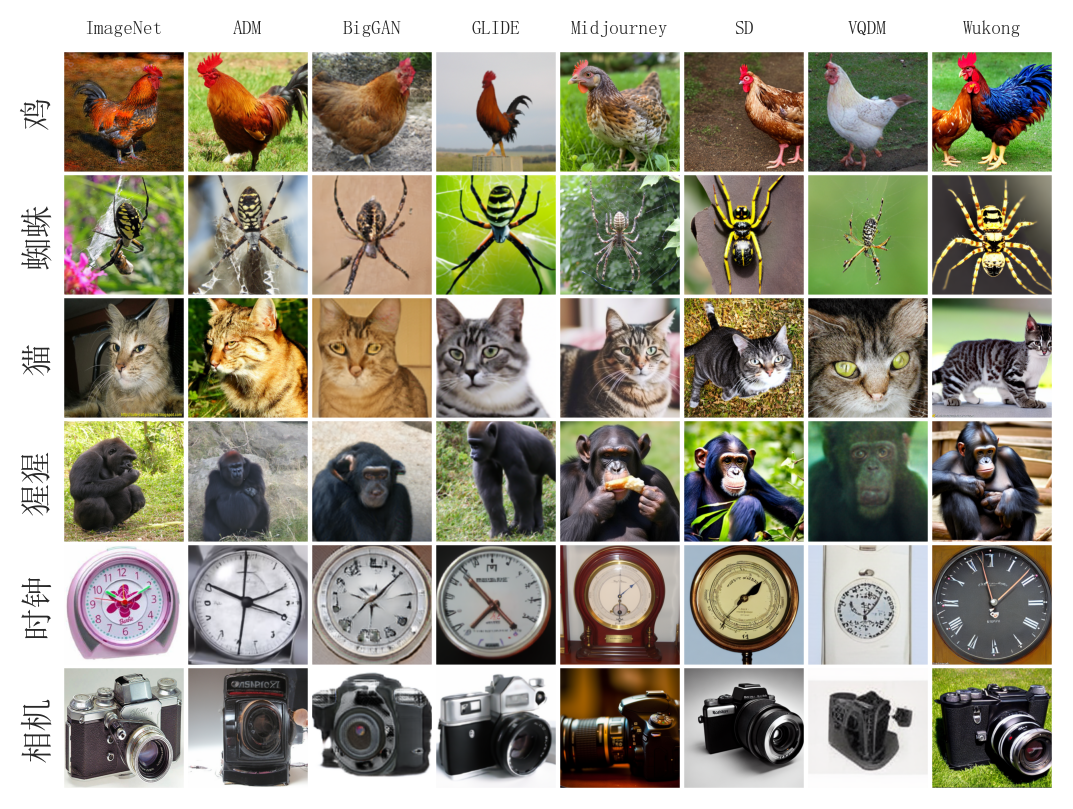

In [36]:
root = r'C:\Users\30739\Desktop\figure_img'
dataset_name = ['ImageNet','ADM','BigGAN','GLIDE','Midjourney','SD','VQDM','Wukong']
class_name = ['鸡','蜘蛛','猫','猩猩','时钟','相机']
imgs = os.listdir(root)
imgs.sort()

plt.figure(dpi=200)
for i,img in enumerate(imgs):
    plt.subplot(6,8,i+1)
    plt.subplots_adjust(wspace =0, hspace =0)
    img = Image.open(f'{root}/{img}')
    img = img.resize((512,512))
    plt.imshow(img)
    if i < 8:
        plt.title(dataset_name[i],fontsize=7)
    if i % 8 == 0:
        plt.ylabel(class_name[(i//8)])
    plt.yticks([])
    plt.xticks([])
plt.show()

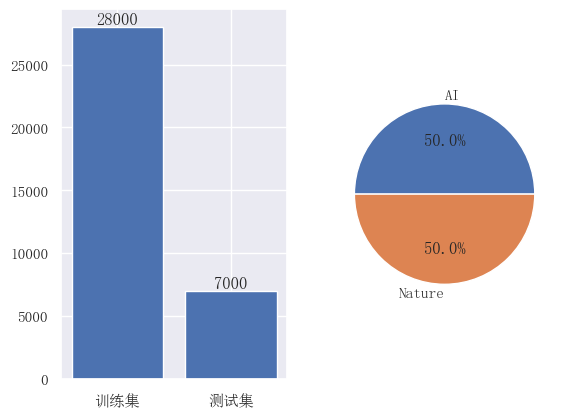

In [37]:
plt.subplot(1,2,1)
bar1 = plt.bar(['Train set','Test set'],[4000*7,1000*7],label='Num of img')
plt.bar_label(bar1,labels=[4000*7,1000*7],padding=0.2)
plt.subplot(1,2,2)
plt.pie([2500*7,2500*7],labels=['AI','Nature'], autopct='%1.1f%%')
plt.show()

In [38]:
class JpegZip:
    def __init__(self,p=1.) -> None:
        self.p = p
        # self.q = int(q*100)
    def __call__(self,img,q):
        if np.random.rand()<self.p:
            img = np.array(img)
            _, img = cv.imencode('.jpg', img, [int(cv.IMWRITE_JPEG_QUALITY), q])
            img = np.array(img).tobytes()
            img = cv.imdecode(np.frombuffer(img, np.uint8), 1)
            img = Image.fromarray(img)
        return img

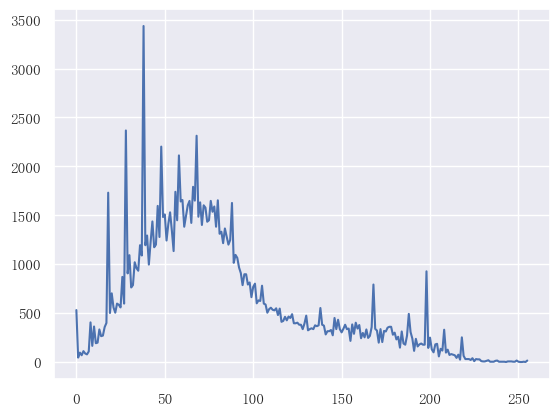

In [50]:
jz = JpegZip()
img_path = './dataset/TinyGenImage/imagenet_ai_0424_sdv5/train/nature/n01440764_12548.JPEG'
img1 = Image.open('./dataset/TinyGenImage/imagenet_ai_0424_sdv5/train/nature/n01440764_12548.JPEG').convert('L').resize([224,224])
img2 = Image.open('./dataset/TinyGenImage/imagenet_ai_0424_sdv5/train/nature/n01440764_12548.JPEG').convert('L').resize([224,224])
img2 = jz(img2,10)
img1 = np.asarray(img1).flatten()
hist,_ = np.histogram(img2, bins=256, range=[0, 256])
plt.plot(hist)